<a href="https://colab.research.google.com/github/aumkhamar23/Dry-and-Wet-Waste-Segregator/blob/main/dry%20wet%20waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = "/content/waste_data.zip"  # Change to the correct filename
extract_path = "/content/waste_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Extract to this folder

print("Extraction complete!")


Extraction complete!


In [ ]:
import os

dataset_path = "/content/waste_dataset"
print("Dataset contents:", os.listdir(dataset_path))


Dataset contents: ['DATASET', 'dataset']


In [ ]:
import os

dataset_path = "/content/waste_dataset"
print("Subfolders inside waste_dataset:", os.listdir(dataset_path))


Subfolders inside waste_dataset: ['DATASET', '.ipynb_checkpoints', 'dataset']


In [ ]:
dataset_path = "/content/waste_dataset/DATASET"  # Or "/content/waste_dataset/dataset" if needed
print("Updated dataset path:", os.listdir(dataset_path))


Updated dataset path: ['.ipynb_checkpoints', 'TEST', 'TRAIN']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set correct dataset path
dataset_path = "/content/waste_dataset/DATASET"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation & normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Training Data
train_data = datagen.flow_from_directory(
    os.path.join(dataset_path, "TRAIN"),  # Corrected Path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    os.path.join(dataset_path, "TRAIN"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

print("Dataset Loaded Successfully!")


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Dataset Loaded Successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Wet vs Dry)
])

# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of Model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
epochs = 10  # You can increase this for better accuracy

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2143s 4s/step - accuracy: 0.7797 - loss: 0.4932 - val_accuracy: 0.8265 - val_loss: 0.3870
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2150s 4s/step - accuracy: 0.8438 - loss: 0.3661 - val_accuracy: 0.8358 - val_loss: 0.4049
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2094s 4s/step - accuracy: 0.8741 - loss: 0.3094 - val_accuracy: 0.8238 - val_loss: 0.4106
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2070s 4s/step - accuracy: 0.8882 - loss: 0.2695 - val_accuracy: 0.8293 - val_loss: 0.4399
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2060s 4s/step - accuracy: 0.9098 - loss: 0.2227 - val_accuracy: 0.8342 - val_loss: 0.4726
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2061s 4s/step - accuracy: 0.9379 - loss: 0.1533 - val_accuracy: 0.8371 - val_loss: 0.5798
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2054s 4s/step - accuracy: 0.9598 - loss: 0.1103 - val_accuracy: 0.8333 - val_loss: 0.6379
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 2077s 4s/step - accuracy: 0.9774 - loss: 0.0659 - 

In [ ]:
# Evaluate Model
test_loss, test_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {test_acc:.2f}")

# Save the trained model
model.save("waste_classifier.h5")
print("Model saved successfully!")


141/141 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7922 - loss: 1.2891


Validation Accuracy: 0.80
Model saved successfully!


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load trained model
model = tf.keras.models.load_model("waste_classifier.h5")

# Define labels
labels = {0: "Wet Waste", 1: "Dry Waste"}

# Start camera
cap = cv2.VideoCapture(0)  # Use 0 for laptop webcam, change if using external cam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess image
    img = cv2.resize(frame, (224, 224))  # Resize to match model input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict waste type
    prediction = model.predict(img)
    class_idx = int(prediction[0] > 0.5)  # Convert to 0 or 1
    label = labels[class_idx]

    # Display result
    cv2.putText(frame, f"Prediction: {label}", (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Waste Classification", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow  # Import for Colab image display

# Load trained model
model = tf.keras.models.load_model("waste_classifier.h5")

# Define labels
labels = {0: "Wet Waste", 1: "Dry Waste"}

# Start camera
cap = cv2.VideoCapture(0)  # Use 0 for laptop webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess image
    img = cv2.resize(frame, (224, 224))  # Resize to match model input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict waste type
    prediction = model.predict(img)
    class_idx = int(prediction[0] > 0.5)  # Convert to 0 or 1
    label = labels[class_idx]

    # Display result
    cv2.putText(frame, f"Prediction: {label}", (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

    # Press 'q' to exit (This won't work in Colab, so you'll need to manually stop execution)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Saving glass.jpeg to glass.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


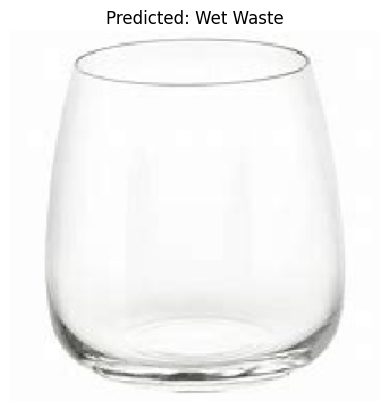

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Make prediction
    prediction = model.predict(img_array)
    class_label = "Dry Waste" if prediction[0][0] > 0.5 else "Wet Waste"

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_label}")
    plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()  # Manually upload files each time you run this cell

# Display uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded: {file_name}")


Saving apple.jpeg to apple.jpeg
Uploaded: apple.jpeg


In [ ]:
model.save("waste_classifier.h5")  # Saves the trained model
from google.colab import files
files.download("waste_classifier.h5")  # Download model to your PC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>